# Machine Learning Optimization 1: 

The purpose of this notebook is to optimize the models run in ML_final_analysis by changing the Feature set. 

**Feature Engineering**
We will create the feature set with
* total_restaurants
* total_reviews
* num_rest_categories
* all the stars ratio: 
    - ratio_stars_1.0
    - ratio_stars_1.5
    - ratio_stars_2.0
    - ratio_stars_2.5
    - ratio_stars_3.0
    - ratio_stars_3.5
    - ratio_stars_4.0
    - ratio_stars_4.5
    - ratio_stars_5.0'

The rationale behind this approach is because we saw when we ran the random forest classifier in ML_final_analysis, that these features were given the highest importance 

In [204]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [92]:
#Read in the CSV and read in the data
df = pd.read_csv("../Resources/neighborhood_tier_final.csv")

In [93]:
df.head()

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,American(Traditional),Diners,Breakfast&Brunch,SushiBars,Japanese,Korean,Steakhouses,AsianFusion,Italian,Pizza,ChickenWings,Brewpubs,Breweries,SportsBars,American(New),Bars,Salad,BeerBar,Lounges,Wraps,Delis,Pubs,WineBars,Gastropubs,JuiceBars&Smoothies,Seafood,Cajun/Creole,Mexican,French,Moroccan,Mediterranean,Chinese,Live/RawFood,Beer,Wine&Spirits,Barbeque,Thai,Bagels,Southern,Irish,Vegan,CocktailBars,Tapas/SmallPlates,IrishPub,CoffeeRoasteries,Cupcakes,Caribbean,Trinidadian,Cafes,ComfortFood,Donuts,AcaiBowls,Vegetarian,Pakistani,Indian,Soup,Halal,StreetVendors,Greek,FoodStands,HotDogs,Gluten-Free,Empanadas,Desserts,WhiskeyBars,LatinAmerican,Honduran,Noodles,Spanish,Cheesesteaks,African,Kebab,Turkish,MiddleEastern,Lebanese,Creperies,Gelato,Poke,Falafel,Pretzels,Wineries,LocalFlavor,Tex-Mex,DiveBars,Peruvian,Tacos,BeerGardens,SoulFood,Ramen,Malaysian,Burmese,Hawaiian,EthnicFood,Do-It-YourselfFood,Sicilian,Filipino,ThemedCafes,Fish&Chips,Sardinian,Laotian,Teppanyaki,Szechuan,ShavedIce,Persian/Iranian,HongKongStyleCafe,Taiwanese,PanAsian,NewMexicanCuisine,Oriental,Dominican,InternetCafes,Cuban,PuertoRican,Portuguese,DimSum,TapasBars,Cantonese,Arabic,CandyStores,Buffets,Brasseries,Distilleries,Ethiopian,Salvadoran,Karaoke,Mongolian,British,German,Syrian,Armenian,Waffles,ModernEuropean,Colombian,Haitian,Czech,Pop-UpRestaurants,TikiBars,Polish,Hainan,TeaRooms,Russian,Cafeteria,Afghan,Somali,Argentine,Brazilian,PianoBars,Senegalese,Tuscan,Smokehouse,Cambodian,Patisserie/CakeShop,Venezuelan,Shanghainese,Indonesian,GayBars,Kombucha,Calabrian,Australian,Iberian,JapaneseCurry,Izakaya,Nicaraguan,HotPot,Kosher,Pancakes,Egyptian,SriLankan,Uzbek,Scandinavian,Himalayan/Nepalese,ChampagneBars,Delicatessen,Israeli,ShavedSnow,Macarons,Georgian,Belgian,Fuzhou,Basque,Ukrainian,Fondue,Singaporean,SouthAfrican,Bangladeshi,Hungarian,Bistros,Scottish,Guamanian,Tonkatsu,Donburi,Pita,Austrian,EasternEuropean,Cucinacampana,ConveyorBeltSushi,Poutineries,Coffeeshops,SerboCroatian,BubbleTea_stars,Coffee&Tea_stars,Bakeries_stars,Burgers_stars,FastFood_stars,Sandwiches_stars,IceCream&FrozenYogurt_stars,Vietnamese_stars,FoodTrucks_stars,American(Traditional)_stars,Diners_stars,Breakfast&Brunch_stars,SushiBars_stars,Japanese_stars,Korean_stars,Steakhouses_stars,AsianFusion_stars,Italian_stars,Pizza_stars,ChickenWings_stars,Brewpubs_stars,Breweries_stars,SportsBars_stars,American(New)_stars,Bars_stars,Salad_stars,BeerBar_stars,Lounges_stars,Wraps_stars,Delis_stars,Pubs_stars,WineBars_stars,Gastropubs_stars,JuiceBars&Smoothies_stars,Seafood_stars,Cajun/Creole_stars,Mexican_stars,French_stars,Moroccan_stars,Mediterranean_stars,Chinese_stars,Live/RawFood_stars,Beer_stars,Wine&Spirits_stars,Barbeque_stars,Thai_stars,Bagels_stars,Southern_stars,Irish_stars,Vegan_stars,CocktailBars_stars,Tapas/SmallPlates_stars,IrishPub_stars,CoffeeRoasteries_stars,Cupcakes_stars,Caribbean_stars,Trinidadian_stars,Cafes_stars,ComfortFood_stars,Donuts_stars,AcaiBowls_stars,Vegetarian_stars,Pakistani_stars,Indian_stars,Soup_stars,Halal_stars,StreetVendors_stars,Greek_stars,FoodStands_stars,HotDogs_stars,Gluten-Free_stars,Empanadas_stars,Desserts_stars,WhiskeyBars_stars,LatinAmerican_stars,Honduran_stars,Noodles_stars,Spanish_stars,Cheesesteaks_stars,African_stars,Kebab_stars,Turkish_stars,MiddleEastern_stars,Lebanese_stars,Creperies_stars,Gelato_stars,Poke_stars,Falafel_stars,Pretzels_stars,Wineries_stars,LocalFlavor_stars,Tex-Mex_stars,DiveBars_stars,Peruvian_stars,Tacos_stars,BeerGardens_stars,SoulFood_stars,Ramen_stars,Malaysian_stars,Burmese_stars,Hawaiian_stars,EthnicFood_stars,Do-It-YourselfFood_stars,Sicilian_stars,Filipino_stars,ThemedCafes_stars,Fish&Chips_stars,Sardinian_stars,Laotian_stars,Teppanyaki_stars,Szechuan_stars,ShavedIce_stars,Persian/Iranian_stars,HongKongStyleCafe_stars,Taiwanese_stars

In [94]:
df.shape

(760, 448)

In [95]:
df.columns.to_list()

['postal_code',
 'State',
 'City',
 'CountyName',
 '2021',
 'total_restaurants',
 'avg_stars',
 'total_reviews',
 'BubbleTea',
 'Coffee&Tea',
 'Bakeries',
 'Burgers',
 'FastFood',
 'Sandwiches',
 'IceCream&FrozenYogurt',
 'Vietnamese',
 'FoodTrucks',
 'American(Traditional)',
 'Diners',
 'Breakfast&Brunch',
 'SushiBars',
 'Japanese',
 'Korean',
 'Steakhouses',
 'AsianFusion',
 'Italian',
 'Pizza',
 'ChickenWings',
 'Brewpubs',
 'Breweries',
 'SportsBars',
 'American(New)',
 'Bars',
 'Salad',
 'BeerBar',
 'Lounges',
 'Wraps',
 'Delis',
 'Pubs',
 'WineBars',
 'Gastropubs',
 'JuiceBars&Smoothies',
 'Seafood',
 'Cajun/Creole',
 'Mexican',
 'French',
 'Moroccan',
 'Mediterranean',
 'Chinese',
 'Live/RawFood',
 'Beer',
 'Wine&Spirits',
 'Barbeque',
 'Thai',
 'Bagels',
 'Southern',
 'Irish',
 'Vegan',
 'CocktailBars',
 'Tapas/SmallPlates',
 'IrishPub',
 'CoffeeRoasteries',
 'Cupcakes',
 'Caribbean',
 'Trinidadian',
 'Cafes',
 'ComfortFood',
 'Donuts',
 'AcaiBowls',
 'Vegetarian',
 'Pakistani'

# Feature Engineering

In [96]:
#Drop counties that have less than 10 zipcodes
df = df.groupby('CountyName').filter(lambda x : len(x)>10)
df.shape

(663, 448)

#drop unneeded columns
df = df.drop(columns=['postal_code', 'State', 'City', 'CountyName', '2021',"avg_stars", "Average County House Price", "Neighborhood Indicator",
                      'BubbleTea_stars','Coffee&Tea_stars','Bakeries_stars','Burgers_stars','FastFood_stars','Sandwiches_stars',
                      'IceCream&FrozenYogurt_stars','Vietnamese_stars','FoodTrucks_stars','American(Traditional)_stars',
                      'Diners_stars','Breakfast&Brunch_stars','SushiBars_stars','Japanese_stars','Korean_stars',
                      'Steakhouses_stars','AsianFusion_stars','Italian_stars','Pizza_stars','ChickenWings_stars',
                      'Brewpubs_stars','Breweries_stars','SportsBars_stars','American(New)_stars','Bars_stars','Salad_stars',
                      'BeerBar_stars','Lounges_stars','Wraps_stars','Delis_stars','Pubs_stars','WineBars_stars',
                      'Gastropubs_stars','JuiceBars&Smoothies_stars','Seafood_stars','Cajun/Creole_stars',
                      'Mexican_stars','French_stars','Moroccan_stars','Mediterranean_stars','Chinese_stars',
                      'Live/RawFood_stars','Beer_stars','Wine&Spirits_stars','Barbeque_stars','Thai_stars',
                      'Bagels_stars','Southern_stars','Irish_stars','Vegan_stars','CocktailBars_stars',
                      'Tapas/SmallPlates_stars','IrishPub_stars','CoffeeRoasteries_stars','Cupcakes_stars',
                      'Caribbean_stars','Trinidadian_stars','Cafes_stars','ComfortFood_stars','Donuts_stars',
                      'AcaiBowls_stars','Vegetarian_stars','Pakistani_stars','Indian_stars','Soup_stars','Halal_stars', 
                      'StreetVendors_stars','Greek_stars','FoodStands_stars','HotDogs_stars','Gluten-Free_stars',
                      'Empanadas_stars','Desserts_stars','WhiskeyBars_stars','LatinAmerican_stars',
                      'Honduran_stars','Noodles_stars','Spanish_stars','Cheesesteaks_stars','African_stars',
                      'Kebab_stars','Turkish_stars','MiddleEastern_stars','Lebanese_stars','Creperies_stars',
                      'Gelato_stars','Poke_stars','Falafel_stars','Pretzels_stars','Wineries_stars','LocalFlavor_stars',
                      'Tex-Mex_stars','DiveBars_stars','Peruvian_stars','Tacos_stars','BeerGardens_stars','SoulFood_stars',
                      'Ramen_stars','Malaysian_stars','Burmese_stars','Hawaiian_stars','EthnicFood_stars','Do-It-YourselfFood_stars',
                      'Sicilian_stars','Filipino_stars','ThemedCafes_stars','Fish&Chips_stars','Sardinian_stars',
                      'Laotian_stars','Teppanyaki_stars','Szechuan_stars','ShavedIce_stars','Persian/Iranian_stars',
                      'HongKongStyleCafe_stars','Taiwanese_stars','PanAsian_stars','NewMexicanCuisine_stars','Oriental_stars',
                      'Dominican_stars','InternetCafes_stars','Cuban_stars','PuertoRican_stars','Portuguese_stars','DimSum_stars',
                      'TapasBars_stars','Cantonese_stars','Arabic_stars','CandyStores_stars','Buffets_stars','Brasseries_stars',
                      'Distilleries_stars','Ethiopian_stars','Salvadoran_stars','Karaoke_stars','Mongolian_stars',
                      'British_stars','German_stars','Syrian_stars','Armenian_stars','Waffles_stars','ModernEuropean_stars',
                      'Colombian_stars','Haitian_stars','Czech_stars','Pop-UpRestaurants_stars','TikiBars_stars','Polish_stars',
                      'Hainan_stars','TeaRooms_stars','Russian_stars','Cafeteria_stars','Afghan_stars','Somali_stars','Argentine_stars',
                      'Brazilian_stars','PianoBars_stars', 'Senegalese_stars', 'Tuscan_stars','Smokehouse_stars',
                      'Cambodian_stars','Patisserie/CakeShop_stars','Venezuelan_stars','Shanghainese_stars',
                      'Indonesian_stars','GayBars_stars','Kombucha_stars','Calabrian_stars','Australian_stars',
                      'Iberian_stars','JapaneseCurry_stars','Izakaya_stars','Nicaraguan_stars','HotPot_stars','Kosher_stars',
                      'Pancakes_stars','Egyptian_stars','SriLankan_stars','Uzbek_stars','Scandinavian_stars','Himalayan/Nepalese_stars',
                      'ChampagneBars_stars','Delicatessen_stars','Israeli_stars','ShavedSnow_stars','Macarons_stars',
                      'Georgian_stars','Belgian_stars','Fuzhou_stars','Basque_stars','Ukrainian_stars',
                      'Fondue_stars','Singaporean_stars','SouthAfrican_stars','Bangladeshi_stars',
                      'Hungarian_stars','Bistros_stars','Scottish_stars','Guamanian_stars','Tonkatsu_stars',
                      'Donburi_stars','Pita_stars','Austrian_stars','EasternEuropean_stars','Cucinacampana_stars',
                      'ConveyorBeltSushi_stars','Poutineries_stars','Coffeeshops_stars','SerboCroatian_stars','stars_1.0_ratio',
                      'stars_1.0','stars_1.5','stars_2.0','stars_2.5','stars_3.0','stars_3.5','stars_4.0','stars_4.5',
                      'stars_5.0','total_stars',])

In [80]:
df.head()

,total_restaurants,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,American(Traditional),Diners,Breakfast&Brunch,SushiBars,Japanese,Korean,Steakhouses,AsianFusion,Italian,Pizza,ChickenWings,Brewpubs,Breweries,SportsBars,American(New),Bars,Salad,BeerBar,Lounges,Wraps,Delis,Pubs,WineBars,Gastropubs,JuiceBars&Smoothies,Seafood,Cajun/Creole,Mexican,French,Moroccan,Mediterranean,Chinese,Live/RawFood,Beer,Wine&Spirits,Barbeque,Thai,Bagels,Southern,Irish,Vegan,CocktailBars,Tapas/SmallPlates,IrishPub,CoffeeRoasteries,Cupcakes,Caribbean,Trinidadian,Cafes,ComfortFood,Donuts,AcaiBowls,Vegetarian,Pakistani,Indian,Soup,Halal,StreetVendors,Greek,FoodStands,HotDogs,Gluten-Free,Empanadas,Desserts,WhiskeyBars,LatinAmerican,Honduran,Noodles,Spanish,Cheesesteaks,African,Kebab,Turkish,MiddleEastern,Lebanese,Creperies,Gelato,Poke,Falafel,Pretzels,Wineries,LocalFlavor,Tex-Mex,DiveBars,Peruvian,Tacos,BeerGardens,SoulFood,Ramen,Malaysian,Burmese,Hawaiian,EthnicFood,Do-It-YourselfFood,Sicilian,Filipino,ThemedCafes,Fish&Chips,Sardinian,Laotian,Teppanyaki,Szechuan,ShavedIce,Persian/Iranian,HongKongStyleCafe,Taiwanese,PanAsian,NewMexicanCuisine,Oriental,Dominican,InternetCafes,Cuban,PuertoRican,Portuguese,DimSum,TapasBars,Cantonese,Arabic,CandyStores,Buffets,Brasseries,Distilleries,Ethiopian,Salvadoran,Karaoke,Mongolian,British,German,Syrian,Armenian,Waffles,ModernEuropean,Colombian,Haitian,Czech,Pop-UpRestaurants,TikiBars,Polish,Hainan,TeaRooms,Russian,Cafeteria,Afghan,Somali,Argentine,Brazilian,PianoBars,Senegalese,Tuscan,Smokehouse,Cambodian,Patisserie/CakeShop,Venezuelan,Shanghainese,Indonesian,GayBars,Kombucha,Calabrian,Australian,Iberian,JapaneseCurry,Izakaya,Nicaraguan,HotPot,Kosher,Pancakes,Egyptian,SriLankan,Uzbek,Scandinavian,Himalayan/Nepalese,ChampagneBars,Delicatessen,Israeli,ShavedSnow,Macarons,Georgian,Belgian,Fuzhou,Basque,Ukrainian,Fondue,Singaporean,SouthAfrican,Bangladeshi,Hungarian,Bistros,Scottish,Guamanian,Tonkatsu,Donburi,Pita,Austrian,EasternEuropean,Cucinacampana,ConveyorBeltSushi,Poutineries,Coffeeshops,SerboCroatian,num_rest_categories,Neighborhood Tiers,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
0,83,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,0.0,3.0,15.0,3.0,11.0,2.0,1.0,1.0,2.0,2.0,6.0,13.0,18.0,0.0,0.0,4.0,6.0,10.0,5.0,3.0,0.0,1.0,5.0,0.0,2.0,0.0,1.0,7.0,1.0,11.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,6.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,3,0.036145,0.108434,0.144578,0.108434,0.132530,0.084337,0.192771,0.180723,0.012048
1,182,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,3.0,15.0,16.0,3.0,13.0,7.0,5.0,5.0,5.0,6.0,12.0,22.0,17.0,0.0,0.0,3.0,9.0,12.0,8.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,3.0,9.0,2.0,40.0,0.0,0.0,8.0,9.0,0.0,1.0,1.0,5.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,2.0,4.0,5.0,5.0,4.0,1.0,1.0,7.0,0.0,18.0,1.0,3.0,0.0,0.0,2.0,1.0,3.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,1.0,1.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.

In [81]:
df.shape

(760, 221)

In [ ]:
df_filtered = df[df[''] >= 25]

### Create Scaled Training and Test data

In [28]:
# Create the features
X = df[['total_restaurants','total_reviews','num_rest_categories','ratio_stars_1.0','ratio_stars_1.5',
        'ratio_stars_2.0','ratio_stars_2.5','ratio_stars_3.0','ratio_stars_3.5',
        'ratio_stars_4.0','ratio_stars_4.5','ratio_stars_5.0']]
X.head()

,total_restaurants,total_reviews,num_rest_categories,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
0,83,4257.0,60,0.036145,0.108434,0.144578,0.108434,0.132530,0.084337,0.192771,0.180723,0.012048
1,182,12761.0,92,0.027473,0.060440,0.087912,0.049451,0.142857,0.126374,0.214286,0.219780,0.071429
2,69,6690.0,57,0.014493,0.057971,0.115942,0.101449,0.159420,0.231884,0.188406,0.130435,0.000000
3,147,16663.0,93,0.006803,0.034014,0.061224,0.034014,0.074830,0.149660,0.292517,0.292517,0.054422
4,81,4994.0,53,0.012346,0.098765,0.074074,0.135802,0.172840,0.185185,0.135802,0.111111,0.074074


In [29]:
X.describe()

,total_restaurants,total_reviews,num_rest_categories,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,43.455263,4701.144737,38.630263,0.007052,0.036556,0.064652,0.087822,0.135304,0.202670,0.250759,0.171935,0.043251
std,44.674411,10576.018090,23.474010,0.028518,0.051257,0.089229,0.090884,0.131939,0.130834,0.159497,0.160958,0.106833
min,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,457.750000,20.000000,0.000000,0.000000,0.000000,0.019808,0.068690,0.134295,0.166667,0.090404,0.000000
50%,30.500000,1574.500000,37.000000,0.000000,0.018519,0.048465,0.076923,0.120784,0.200000,0.244173,0.150000,0.016001
75%,63.250000,5084.750000,55.000000,0.000000,0.055556,0.092593,0.127153,0.166667,0.262002,0.321950,0.219231,0.050158
max,361.000000,176931.000000,130.000000,0.500000,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Create target variable
y = df['Neighborhood Tiers']
y.head()

0    3
1    2
2    2
3    2
4    3
Name: Neighborhood Tiers, dtype: int64

In [31]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")


y_train: Counter({2: 284, 1: 144, 3: 142})
y_test: Counter({2: 85, 3: 59, 1: 46})


In [32]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
X_train_scaled[:, 2]

array([ 0.51419961, -1.08855814, -1.46815866, -0.75113546, -0.45589061,
       -0.70895762,  1.02033364,  0.68291096,  0.8516223 ,  0.64073312,
        0.8516223 , -0.62460195, -0.79331329, -0.03411225,  0.05024342,
        1.86389036, -0.03411225,  0.13459909, -0.41371277, -0.70895762,
       -0.9198468 ,  2.45438006,  2.0326017 , -0.83549113, -1.55251434,
       -0.66677979,  0.64073312,  1.10468932,  1.61082334, -0.83549113,
        0.72508879,  0.2611326 , -0.37153494, -0.37153494,  2.28566872,
       -1.38380299, -0.54024628, -1.00420247, -1.46815866,  0.68291096,
       -0.07629009, -0.49806844,  0.05024342, -0.66677979,  1.14686715,
       -1.17291381,  0.47202178,  0.2611326 ,  0.34548827,  0.76726663,
       -0.87766896,  0.8516223 ,  0.93597797, -1.38380299,  0.55637745,
       -0.87766896,  0.2611326 ,  0.30331044, -1.46815866,  0.09242126,
       -0.58242411,  0.2611326 ,  0.8516223 ,  0.93597797,  0.30331044,
       -0.9198468 , -0.45589061,  0.47202178,  0.34548827, -1.55

In [34]:
X_test_scaled[:,2]

array([ 1.14686715, -1.21509165,  1.73735685,  0.64073312, -0.24500143,
        0.55637745, -1.21509165,  1.18904499, -1.34162516, -0.66677979,
       -0.07629009,  0.55637745, -0.9198468 ,  0.76726663, -0.37153494,
        0.05024342,  0.51419961, -0.70895762,  0.00806559, -0.3293571 ,
        1.82171252,  0.05024342, -0.83549113, -1.13073598, -0.11846792,
       -0.54024628,  0.80944447,  1.61082334, -0.58242411, -0.66677979,
        1.61082334, -0.20282359, -1.21509165, -0.62460195, -1.17291381,
       -0.20282359,  1.442112  , -0.58242411, -0.28717926, -1.29944732,
        2.20131304, -1.00420247, -0.49806844, -0.75113546, -1.42598083,
       -1.13073598,  0.17677693,  1.02033364, -0.41371277,  0.21895476,
       -0.9198468 , -0.03411225, -0.83549113, -0.96202464, -1.55251434,
        1.02033364,  1.39993417, -1.08855814, -0.07629009,  1.23122282,
        0.34548827,  1.02033364, -0.83549113, -0.66677979, -1.13073598,
       -0.87766896, -1.55251434, -0.54024628,  1.14686715, -0.03

# Create a logistic regression model

In [35]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [36]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [37]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
470,1,1
733,3,2
546,1,1
442,2,1
693,2,3
353,2,3
759,2,2
202,2,2
602,2,2
153,3,2


In [38]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
acc_LR = balanced_accuracy_score(y_test, y_pred_LR)
acc_LR

0.4129105437311255

In [39]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.5631578947368421

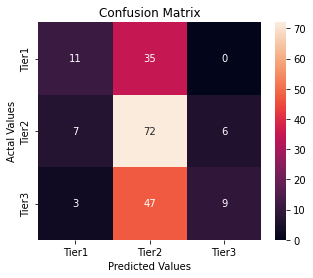

In [40]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [41]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.52      0.24      0.33        46
           2       0.47      0.85      0.60        85
           3       0.60      0.15      0.24        59

    accuracy                           0.48       190
   macro avg       0.53      0.41      0.39       190
weighted avg       0.52      0.48      0.42       190



# Create Balanced Random Forest Classifier

In [161]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=50, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=50, random_state=1)

In [162]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_RF)


0.5047928677734911

In [163]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.7473684210526316

In [164]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head(20)

,Prediction,Actual
470,1,1
733,3,2
546,2,1
442,1,1
693,3,3
353,2,3
759,1,2
202,2,2
602,2,2
153,3,2


In [165]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([0.08192804, 0.12801096, 0.08692128, 0.03660522, 0.0609449 ,
       0.09105811, 0.08916053, 0.08058864, 0.10419481, 0.10262137,
       0.07510283, 0.06286332])

In [166]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)


[(0.12801096354935707, 'total_reviews'),
 (0.10419480733223035, 'ratio_stars_3.5'),
 (0.10262137260212242, 'ratio_stars_4.0'),
 (0.09105811142839827, 'ratio_stars_2.0'),
 (0.08916052701484607, 'ratio_stars_2.5'),
 (0.08692127671125867, 'num_rest_categories'),
 (0.08192804486801493, 'total_restaurants'),
 (0.08058863648086273, 'ratio_stars_3.0'),
 (0.07510282594433382, 'ratio_stars_4.5'),
 (0.06286332233678496, 'ratio_stars_5.0'),
 (0.0609448954698223, 'ratio_stars_1.5'),
 (0.03660521626196847, 'ratio_stars_1.0')]

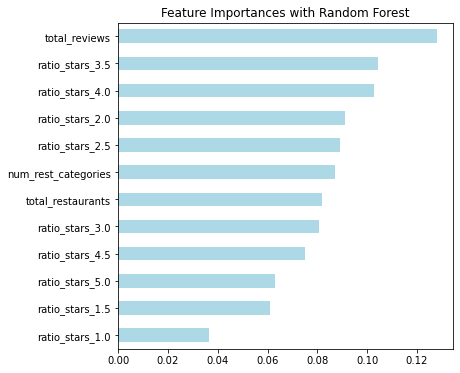

In [199]:
# Plot influential features based on Random Forest model:
influential_features = pd.Series(model_RF.feature_importances_, X.columns)
influential_features.nlargest(12).sort_values().plot(kind='barh', color='lightblue', figsize=(6,6))
plt.title('Feature Importances with Random Forest');


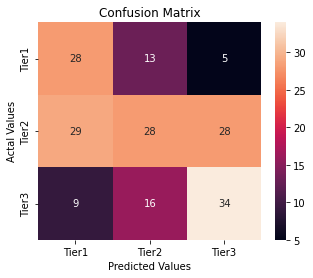

In [167]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [168]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.42      0.61      0.50        46
           2       0.49      0.33      0.39        85
           3       0.51      0.58      0.54        59

    accuracy                           0.47       190
   macro avg       0.47      0.50      0.48       190
weighted avg       0.48      0.47      0.47       190



# Create Easy Ensemble AdaBoost Classifier

In [187]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=75, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=75, random_state=1)

In [188]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_Ada)

0.49914315025936684

In [189]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
470,1,1
733,3,2
546,1,1
442,1,1
693,3,3
353,2,3
759,2,2
202,2,2
602,2,2
153,3,2


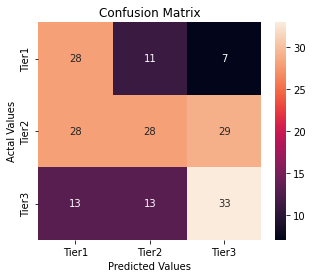

In [190]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [191]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.41      0.61      0.49        46
           2       0.54      0.33      0.41        85
           3       0.48      0.56      0.52        59

    accuracy                           0.47       190
   macro avg       0.47      0.50      0.47       190
weighted avg       0.49      0.47      0.46       190



# Create Gradient Boosting Classifier

In [174]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.595
Accuracy score (validation): 0.458

Learning rate:  0.1
Accuracy score (training): 0.682
Accuracy score (validation): 0.453

Learning rate:  0.25
Accuracy score (training): 0.796
Accuracy score (validation): 0.453

Learning rate:  0.5
Accuracy score (training): 0.911
Accuracy score (validation): 0.421

Learning rate:  0.75
Accuracy score (training): 0.951
Accuracy score (validation): 0.405

Learning rate:  1
Accuracy score (training): 0.970
Accuracy score (validation): 0.432



In [175]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=10,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
470,1,1
733,2,2
546,2,1
442,1,1
693,3,3
353,2,3
759,3,2
202,2,2
602,3,2
153,3,2


In [176]:
balanced_accuracy_score(y_test, y_pred_GBC)

0.4015475313190862

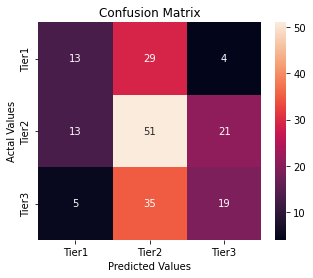

In [177]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [178]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.42      0.28      0.34        46
           2       0.44      0.60      0.51        85
           3       0.43      0.32      0.37        59

    accuracy                           0.44       190
   macro avg       0.43      0.40      0.41       190
weighted avg       0.43      0.44      0.42       190



# Naive Bayes model

In [179]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [180]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [181]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
470,1,1
733,2,2
546,1,1
442,2,1
693,3,3
353,2,3
759,2,2
202,2,2
602,2,2
153,3,2


In [182]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.5157894736842106


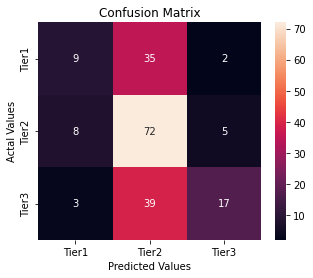

In [183]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [184]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.45      0.20      0.27        46
           2       0.49      0.85      0.62        85
           3       0.71      0.29      0.41        59

    accuracy                           0.52       190
   macro avg       0.55      0.44      0.44       190
weighted avg       0.55      0.52      0.47       190



In [206]:
# print the accuracy score of each model:
print('----------------------------------------')
print('Accuracy')
print('----------------------------------------')
print('Naive Bayes Test Accuracy: ', accuracy_score(y_test, y_pred_bayes)*100,'%')
print('Random Forest Test Accuracy: ', accuracy_score(y_test, y_pred_RF)*100,'%')
print('Adaboost Test Accuracy: ', accuracy_score(y_test, y_pred_Ada)*100,'%')
print('Gradient Boost Test Accuracy: ', accuracy_score(y_test, y_pred_GBC)*100,'%')
print('Logistic Regession Test Accuracy: ', accuracy_score(y_test, y_pred_LR)*100,'%')

# Print the F1 score of each model:
print('\n----------------------------------------')    
print('Weighted F1 Score')
print('----------------------------------------')
print('Naive Bayes F1 Score: ', f1_score(y_test, y_pred_bayes, average='weighted'))
print('Random Forest F1 Score: ', f1_score(y_test, y_pred_RF, average='weighted'))
print('Adaboost F1 Score: ', f1_score(y_test, y_pred_Ada, average='weighted'))
print('Gradient Boost F1 Score: ', f1_score(y_test, y_pred_GBC, average='weighted'))
print('Logistic Regession F1 Score: ', f1_score(y_test, y_pred_LR, average='weighted'))


----------------------------------------
Accuracy
----------------------------------------
Naive Bayes Test Accuracy:  51.578947368421055 %
Random Forest Test Accuracy:  47.368421052631575 %
Adaboost Test Accuracy:  46.8421052631579 %
Gradient Boost Test Accuracy:  43.684210526315795 %
Logistic Regession Test Accuracy:  48.421052631578945 %

----------------------------------------
Weighted F1 Score
----------------------------------------
Naive Bayes F1 Score:  0.47211127490138277
Random Forest F1 Score:  0.46506524527280646
Adaboost F1 Score:  0.460875792354975
Gradient Boost F1 Score:  0.4244708306512088
Logistic Regession F1 Score:  0.42457483202437135
